In [ ]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read 2022 file
# -----------------------------
path_2022 = "/content/data/raw/Attendance and Ticket 2022.xlsx" # Corrected file path
df = pd.read_excel(path_2022)

# -----------------------------
# 2. Standardize columns
# -----------------------------
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)

# -----------------------------
# 3. Rename to canonical names
# -----------------------------
df = df.rename(columns={
    "name": "attendee_name",
    "tickets_purchased_115": "tickets_purchased",
    "children_12_free": "children_free",
    "total_tickets": "total_tickets",
    "total_paid": "total_paid"
})

# -----------------------------
# 4. Remove TOTALS row
# -----------------------------
df = df[
    ~df["attendee_name"]
      .astype(str)
      .str.upper()
      .str.contains("TOTAL")
]

# -----------------------------
# 5. Enforce numeric types
# -----------------------------
num_cols = [
    "tickets_purchased",
    "children_free",
    "total_tickets",
    "total_paid"
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# -----------------------------
# 6. Recompute revenue (source of truth)
# -----------------------------
TICKET_PRICE_2022 = 15
df["total_paid_calc"] = df["tickets_purchased"] * TICKET_PRICE_2022

# -----------------------------
# 7. Verification summary
# -----------------------------
summary_2022 = pd.DataFrame({
    "python_total": [
        df["tickets_purchased"].sum(),
        df["children_free"].sum(),
        df["total_tickets"].sum(),
        df["total_paid_calc"].sum()
    ]
}, index=[
    "tickets_purchased",
    "children_free",
    "total_tickets",
    "total_paid"
])

# Store the cleaned dataframe for later use
df_2022 = df.copy()

summary_2022

,python_total
tickets_purchased,141.0
children_free,23.0
total_tickets,164.0
total_paid,2115.0


# Alumni Event Performance Analysis & Forecasting

This project provides a comprehensive analysis of alumni event performance data from 2022 to 2025, culminating in a forecast for the 2026 event. It covers attendance, income, expenses, auction performance, and beverage inventory, offering insights into trends, efficiency, and future financial projections.

## Table of Contents

- [Project Overview](#project-overview)
- [Goals](#goals)
- [Data Sources](#data-sources)
- [Analysis Workflow](#analysis-workflow)
- [Key Findings (EDA)](#key-findings-eda)
- [Forecasting Summary](#forecasting-summary)
- [Interactive Dashboard](#interactive-dashboard)
- [Setup and Usage](#setup-and-usage)

## Project Overview

The aim of this project is to clean, analyze, and visualize multi-year data related to alumni events. The analysis focuses on understanding historical performance, identifying key drivers of financial outcomes, and generating data-driven forecasts for the upcoming 2026 event. This information supports strategic planning and decision-making for future events.

## Goals

- **Data Unification**: Clean and merge disparate datasets (attendance, finance, beverage inventory, marketing, auction) into a consistent format.
- **KPI Calculation**: Compute key performance indicators (KPIs) such as attendance, total income, total expenses, net funds raised, and per-attendee metrics.
- **Exploratory Data Analysis (EDA)**: Identify trends, patterns, and anomalies in historical event performance.
- **Forecasting**: Develop scenario-based forecasts for 2026 attendance, revenue per attendee, cost per attendee, and net funds raised.
- **Visualization**: Create an interactive dashboard to present historical data and future projections concisely.

## Data Sources

The project utilizes raw data from Excel files for each year (2022-2025), which are then cleaned and consolidated into several unified CSVs:

- `attendance_ticket.csv`: Consolidated attendance and ticket sales data.
- `income_expense.csv`: Consolidated income and expense records.
- `beverage_inventory.csv`: Consolidated beverage inventory and cost data.
- `marketing_channels.csv`: Consolidated marketing channel performance.
- `auction_items.csv`: Consolidated auction item data.
- `unified_kpi.csv`: A summary of all key performance indicators per year.

## Analysis Workflow

The analysis proceeds through the following main stages:

1.  **Data Cleaning & Preprocessing**: Each raw Excel file (Attendance, Income/Expense, Beverage, Marketing, Auction) is independently processed to standardize column names, enforce data types, handle missing values, and extract relevant information. Specific adjustments are made for varying column names and data structures across years.
2.  **Data Unification**: Cleaned dataframes for each year and category are concatenated into single, unified dataframes (`attendance_final`, `finance_final`, `beverage_inventory_final`, `marketing_channels_final`, `auction_items_final`).
3.  **KPI Calculation**: A `unified_kpi` DataFrame is constructed by aggregating key metrics (attendance, ticket revenue, total income/expenses, auction revenue, beverage cost) from the cleaned datasets. Per-attendee metrics (revenue, cost, net raised) are also calculated.
4.  **Exploratory Data Analysis (EDA)**: Visualizations and summary statistics are generated to explore trends in attendance, income, expenses, and profitability. Key insights into efficiency and drivers of financial performance are identified.
5.  **Forecasting**: Scenario-based forecasts for 2026 are developed for attendance, revenue per attendee, and cost per attendee using a blend of linear trend extrapolation and recent historical averages. These are then combined to project total income, expenses, and net funds raised for 2026.
6.  **Interactive Dashboard**: A Plotly dashboard is created to visualize historical trends alongside 2026 forecasts, providing an interactive summary of the project's findings.

## Key Findings (EDA)

### Attendance Trends
- Event attendance increased steadily from 2022 through 2024, indicating growing interest and engagement.
- Attendance declined slightly in 2025 but remained significantly higher than 2022–2023 levels, suggesting stabilization rather than loss of interest.

### Income, Expenses, and Net Raised
- Total income peaked in 2023, driven largely by strong auction performance.
- Expenses were also highest in 2023, reducing the net fundraising impact despite higher revenue.
- In 2024 and 2025, tighter expense control resulted in improved net raised outcomes, even when total income was lower.

### Revenue Efficiency per Attendee
- Revenue per attendee was highest in 2022 and 2023, reflecting strong monetization.
- A notable decline occurred in 2024, suggesting lower per-attendee spending despite record attendance.
- Partial recovery in 2025 indicates improved pricing or revenue mix strategies.

### Cost Efficiency per Attendee
- Cost per attendee was highest in the early years (2022–2023), indicating inefficiencies in event operations.
- A significant reduction in cost per attendee occurred in 2024, demonstrating improved operational planning and cost management.
- Costs increased slightly in 2025 but remained substantially lower than earlier years.

### Net Raised per Attendee
- Net raised per attendee remained relatively flat in 2022–2023.
- A dip in 2024 coincided with reduced revenue efficiency.
- 2025 achieved the highest net raised per attendee, highlighting the most efficient and effective year from a fundraising perspective.

### Auction Revenue Analysis
- Auction revenue was a major contributor to total income in 2022 and 2023.
- A sharp decline in auction revenue occurred in 2024, with further reduction in 2025.
- The volatility of auction revenue suggests dependence on item quality, promotion, and bidder engagement, identifying a key area for strategic improvement.

### Beverage Cost Observations
- Beverage costs remained low relative to total expenses and did not significantly impact overall fundraising outcomes.
- Spikes in beverage costs were isolated to specific years and were effectively controlled in later years.

### Overall Insights
- Improvements in cost efficiency had a greater impact on net fundraising outcomes than increases in attendance alone.
- The shift from growth-focused performance to efficiency-driven performance is most evident in 2025.
- Auction strategy and per-attendee monetization represent the highest leverage opportunities for improving future fundraising results.

## Forecasting Summary

The forecasting analysis provides scenario-based projections for the 2026 alumni event, aiming to support planning rather than exact prediction.

### Methodology
- Given limited historical data (2022–2025), a scenario-based approach was used.
- Three key components were forecasted independently: Attendance, Revenue per Attendee, and Cost per Attendee.
- Each component's forecast combined linear trend extrapolation, recent historical averages, and business judgment.
- Scenarios include Conservative, Expected, and Optimistic.

### Attendance Forecast
- Historical trend: Steady growth (2022-2024), modest decline (2025).
- **Expected 2026 Attendance**: Approximately **235 attendees** (range: 223 to 254).
- *Key Takeaway*: Attendance growth is stabilizing at a higher baseline; planning for 230–240 attendees is prudent.

### Revenue per Attendee Forecast
- Historical trend: Strong (2022-2023), sharp decline (2024), partial recovery (2025).
- **Expected 2026 Revenue per Attendee**: Approximately **$49**.
- *Key Takeaway*: Future fundraising should focus on improving per-attendee spend, with auction strategy being a high-leverage opportunity.

### Cost per Attendee Forecast
- Historical trend: High (2022-2023), substantial reduction (2024), stabilized (2025).
- **Expected 2026 Cost per Attendee**: Approximately **$29–$30**.
- *Key Takeaway*: Cost management improvements are durable; focus shifts from cost cutting to revenue optimization.

### Net Funds Raised Forecast
- Computed by combining attendance, revenue per attendee, and cost per attendee forecasts for each scenario.
- **Results**: The event remains financially viable under all scenarios.
  - The **Expected scenario** yields net fundraising outcomes exceeding most historical years.
  - The **Optimistic scenario** shows significant upside, primarily from improved revenue per attendee.

### Key Forecasting Insights
- Improvements in revenue per attendee have a greater impact on fundraising outcomes than attendance growth.
- Sustained cost efficiency reduces financial risk.
- Auction performance is the most influential and volatile revenue driver.

## Interactive Dashboard

A Plotly-based interactive dashboard (`alumni_event_dashboard.html`) is generated to provide a dynamic view of the project's findings. It includes:

- **Attendance Trend**: Historical data (2022-2025) and 2026 forecasts by scenario.
- **Net Funds Raised Trend**: Historical data and 2026 forecasts by scenario.
- **Revenue vs Cost per Attendee**: Historical efficiency and 2026 projections.
- **2026 Financial Breakdown by Scenario**: Grouped bar chart showing projected income, expenses, and net raised for each scenario.
- **2026 Scenario Summary Table**: A detailed table summarizing all forecast metrics across conservative, expected, and optimistic scenarios.

## Setup and Usage

To replicate the analysis and generate the dashboard:

1.  **Environment**: This project is designed to run in a Google Colab environment. Ensure you have access to Colab.
2.  **Data**: Place the raw Excel files (e.g., `Attendance and Ticket 2022.xlsx`, `Income_Expense_2022.xlsx`, etc.) in the `/content/data/raw/` directory within your Colab environment. (These files are assumed to be provided separately).
3.  **Install Dependencies**: Install necessary Python libraries. This notebook already handles `plotly` installation.
4.  **Run Cells**: Execute all code cells in the notebook sequentially.
    - The initial cells clean and unify the various datasets.
    - Subsequent cells calculate KPIs, perform EDA, and generate forecasts.
    - The final cell generates the interactive Plotly dashboard as an HTML file in `data/cleaned/alumni_event_dashboard.html`.

**Note**: The raw data files are not included in this repository due to potential privacy considerations or size. Please ensure you have the necessary data files in the specified paths for the code to run successfully.

# Alumni Event Performance Analysis & Strategic Forecasting

This project delivers a data-driven framework for understanding, optimizing, and strategically planning future alumni events. By analyzing historical performance from 2022-2025, it provides actionable insights into attendance, financial outcomes (income, expenses, net raised), and operational efficiencies, culminating in a robust forecast for the 2026 event. **The primary objective is to equip stakeholders with critical information to make informed business decisions, improve event profitability, and enhance alumni engagement.**

## Table of Contents

- [Project Overview](#project-overview)
- [Business Objectives & Impact](#business-objectives-&-impact)
- [Data Sources](#data-sources)
- [Analysis Workflow](#analysis-workflow)
- [Key Business Insights from EDA](#key-business-insights-from-eda)
- [2026 Strategic Forecast](#2026-strategic-forecast)
- [Interactive Dashboard for Decision Support](#interactive-dashboard-for-decision-support)
- [Setup and Usage](#setup-and-usage)

## Project Overview

This project is designed to transform raw multi-year alumni event data into strategic intelligence. It focuses on identifying performance trends, understanding financial drivers, and providing forward-looking projections to support **proactive decision-making for future event planning, resource allocation, and fundraising strategies**. The analysis ensures that event organizers can move beyond reactive management to a data-informed approach, maximizing both engagement and financial returns.

## Business Objectives & Impact

The core business objectives addressed by this project include:

*   **Optimized Resource Allocation**: By understanding historical cost efficiencies and attendance trends, resources (budget, staffing, inventory) can be allocated more effectively for future events.
*   **Enhanced Fundraising Strategy**: Detailed analysis of income streams, particularly auction performance, identifies high-leverage opportunities to maximize net funds raised.
*   **Improved Event Profitability**: Insights into revenue per attendee and cost per attendee directly inform pricing strategies, expense control, and overall financial health of events.
*   **Strategic Planning for Growth**: Forecasts for attendance and financial metrics provide a foundational baseline for setting realistic goals, evaluating strategic initiatives, and assessing potential risks for the 2026 event and beyond.
*   **Data-Driven Decision-Making**: Moving away from intuition, this project provides concrete data and projections to justify strategic shifts, allocate budgets, and measure success.

## Data Sources

The project consolidates and cleans data from various Excel files (2022-2025) into structured CSVs, forming a unified view of event performance:

*   `attendance_ticket.csv`: Core attendance figures and ticket sales revenue.
*   `income_expense.csv`: Comprehensive breakdown of all income and expenditure.
*   `beverage_inventory.csv`: Cost and consumption patterns of event beverages, informing procurement.
*   `marketing_channels.csv`: Performance of different marketing efforts, aiding future campaign optimization.
*   `auction_items.csv`: Auction item success rates and revenue generation, crucial for fundraising.
*   `unified_kpi.csv`: Aggregated Key Performance Indicators (KPIs) for holistic year-over-year comparison.

## Analysis Workflow

The project follows a systematic approach to ensure data integrity and actionable insights:

1.  **Data Cleaning & Preprocessing**: Raw data from disparate Excel sources is standardized, validated, and transformed.
2.  **Data Unification**: Cleaned yearly dataframes are concatenated into single, comprehensive datasets.
3.  **KPI Calculation**: Key financial and operational metrics are derived and aggregated (e.g., attendance, total income, net raised, revenue/cost per attendee).
4.  **Exploratory Data Analysis (EDA)**: Visualizations and statistical summaries reveal historical trends, patterns, and anomalies, highlighting areas of success and concern.
5.  **Scenario-Based Forecasting**: Projections for 2026 attendance, revenue per attendee, and cost per attendee are developed under Conservative, Expected, and Optimistic scenarios, providing a range for strategic planning.
6.  **Interactive Dashboard**: A dynamic Plotly dashboard synthesizes historical data and future forecasts, offering an intuitive tool for stakeholders.

## Key Business Insights from EDA

The exploratory analysis uncovered several critical business insights:

*   **Attendance Stability**: While attendance grew significantly up to 2024, the slight dip in 2025 suggests a plateau. *This informs marketing efforts to maintain engagement and explores new avenues for growth rather than relying on past momentum.*
*   **Shifting Profitability Drivers**: Total income peaked in 2023, largely due to strong auction performance, but high expenses offset net gains. In contrast, 2024 and 2025 saw improved *net raised* figures due to tighter expense control, even with lower total income. *This highlights the business value of cost efficiency over raw revenue growth in certain periods.*
*   **Revenue Efficiency Volatility**: Revenue per attendee declined significantly in 2024 despite record attendance, implying that higher attendance doesn't automatically translate to higher per-attendee spending. A partial recovery in 2025 suggests improved monetization strategies. *This underscores the need for continuous optimization of pricing and revenue mix.*
*   **Sustained Cost Efficiency**: Post-2023, cost per attendee substantially reduced and stabilized. *This demonstrates successful operational improvements and allows management to focus more on revenue generation rather than reactive cost cutting.*
*   **Auction Performance: High-Impact, High-Volatility**: Auction revenue was a major income contributor but showed a sharp decline in 2024-2025. *This identifies the auction as a critical, yet volatile, element of the fundraising strategy, requiring focused attention on item sourcing and bidder engagement for future events.*
*   **Negligible Beverage Cost Impact**: Beverage costs remained a minor factor in overall expenses. *This suggests less strategic focus is needed here, freeing up resources for higher-impact areas.*

## 2026 Strategic Forecast

The scenario-based forecast for 2026 provides actionable intelligence for strategic planning:

*   **Attendance Forecast (Expected: ~235 attendees; Range: 223-254)**:
    *   *Decision Support*: Helps determine venue capacity, catering needs, staffing levels, and initial budget allocations. The range allows for robust contingency planning.
*   **Revenue per Attendee Forecast (Expected: ~$49; Range: $44.16-$56.43)**:
    *   *Decision Support*: Informs pricing strategies, marketing efforts for high-value segments, and auction item selection. Improving this metric is identified as a key driver for increased profitability.
*   **Cost per Attendee Forecast (Expected: ~$29-30; Range: $27.72-$32.10)**:
    *   *Decision Support*: Provides a baseline for expense management, supplier negotiations, and identifying potential areas for further cost optimization without compromising event quality.
*   **Projected Net Funds Raised**:
    *   *Decision Support*: The combined forecasts provide clear financial projections under different conditions, enabling stakeholders to set realistic fundraising targets and evaluate the overall financial viability and success of the 2026 event. The significant upside potential in the optimistic scenario, driven by revenue per attendee, highlights strategic investment areas.

## Interactive Dashboard for Decision Support

A Plotly-based interactive dashboard (`alumni_event_dashboard.html`) visually summarizes the project's findings and forecasts. This tool enables stakeholders to:

*   Quickly grasp historical trends and 2026 projections.
*   Compare different scenarios for attendance, revenue, and costs.
*   Understand the financial implications of various strategic choices at a glance.
*   Facilitate data-driven discussions and consensus building among the event planning committee.

## Setup and Usage

To replicate the analysis and generate the dashboard:

1.  **Environment**: Google Colab (Python 3.x).
2.  **Data**: Place raw Excel files (e.g., `Attendance and Ticket 2022.xlsx`, `Income_Expense_2022.xlsx`, etc.) into `/content/data/raw/` within the Colab environment.
3.  **Dependencies**: `pandas`, `numpy`, `matplotlib`, `plotly` (already handled in notebook).
4.  **Execution**: Run all code cells sequentially. The cleaned datasets will be saved to `data/cleaned/`, and the dashboard HTML will be generated at `data/cleaned/alumni_event_dashboard.html`.

**Note**: Raw data files are proprietary and not included. Ensure data availability for successful execution.

In [ ]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read 2023 file
# -----------------------------
path_2023 = "/content/data/raw/Attendance and Ticket 2023.xlsx" # Corrected file path
df = pd.read_excel(path_2023)

# -----------------------------
# 2. Standardize columns
# -----------------------------
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)

# -----------------------------
# 3. Rename to canonical names
# -----------------------------
df = df.rename(columns={
    "name": "attendee_name",
    "tickets_purchased_1_20": "tickets_purchased", # Corrected key
    "children__10_free": "children_free",         # Corrected key
    "total_tickets": "total_tickets",
    "total_paid": "total_paid"
})

# -----------------------------
# 4. Remove TOTALS row
# -----------------------------
df = df[
    ~df["attendee_name"]
      .astype(str)
      .str.upper()
      .str.contains("TOTAL")
]

# -----------------------------
# 5. Enforce numeric types
# -----------------------------
num_cols = [
    "tickets_purchased",
    "children_free",
    "total_tickets",
    "total_paid"
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# -----------------------------
# 6. Recompute revenue (source of truth)
# -----------------------------
TICKET_PRICE_2023 = 20
df["total_paid_calc"] = df["tickets_purchased"] * TICKET_PRICE_2023

# -----------------------------
# 7. Verification summary
# -----------------------------
summary_2023 = pd.DataFrame({
    "python_total": [
        df["tickets_purchased"].sum(),
        df["children_free"].sum(),
        df["total_tickets"].sum(),
        df["total_paid_calc"].sum()
    ]
}, index=[
    "tickets_purchased",
    "children_free",
    "total_tickets",
    "total_paid"
])

# Store the cleaned dataframe for later use
df_2023 = df.copy()

summary_2023

,python_total
tickets_purchased,172.0
children_free,19.0
total_tickets,191.0
total_paid,3440.0


In [ ]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read 2024 file
# -----------------------------
path_2024 = "/content/data/raw/Attendance and Ticket 2024.xlsx"
df = pd.read_excel(path_2024)

# -----------------------------
# 2. Standardize columns
# -----------------------------
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)

# -----------------------------
# 3. Rename to canonical names
# -----------------------------
df = df.rename(columns={
    "first_name": "attendee_name", # Corrected from 'name' to 'first_name'
    "tickets_purchased_1_25": "tickets_purchased", # Corrected key
    "children_10_free": "children_free",
    "total_tickets": "total_tickets",
    "total_paid": "total_paid"   # may be empty, we won't trust it
})

# -----------------------------
# 4. Remove TOTALS row
# -----------------------------
df = df[
    ~df["attendee_name"]
      .astype(str)
      .str.upper()
      .str.contains("TOTAL")
]

# -----------------------------
# 5. Enforce numeric types
# -----------------------------
num_cols = [
    "tickets_purchased",
    "children_free",
    "total_tickets"
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# -----------------------------
# 6. Recompute revenue (SOURCE OF TRUTH)
# -----------------------------
TICKET_PRICE_2024 = 20
df["total_paid_calc"] = df["tickets_purchased"] * TICKET_PRICE_2024

# -----------------------------
# 7. Verification summary
# -----------------------------
summary_2024 = pd.DataFrame({
    "python_total": [
        df["tickets_purchased"].sum(),
        df["children_free"].sum(),
        df["total_tickets"].sum(),
        df["total_paid_calc"].sum()
    ]
}, index=[
    "tickets_purchased",
    "children_free",
    "total_tickets",
    "total_paid"
])

# Store the cleaned dataframe for later use
df_2024 = df.copy()

summary_2024

,python_total
tickets_purchased,205.0
children_free,25.0
total_tickets,230.0
total_paid,4100.0


In [ ]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read 2025 file
# -----------------------------
path_2025 = "/content/data/raw/Attendance and Ticket 2025.xlsx"
df = pd.read_excel(path_2025)

# -----------------------------
# 2. Standardize columns
# -----------------------------
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)

# -----------------------------
# 3. Rename to canonical names
# -----------------------------
df = df.rename(columns={
    "first_name": "attendee_name", # Corrected from 'name' to 'first_name'
    "tickets_purchased_1_25": "tickets_purchased", # Corrected key
    "children_10_free": "children_free",
    "total_tickets": "total_tickets",
    "total_paid": "total_paid"   # may or may not be reliable
})

# -----------------------------
# 4. Remove TOTALS row
# -----------------------------
df = df[
    ~df["attendee_name"]
      .astype(str)
      .str.upper()
      .str.contains("TOTAL")
]

# -----------------------------
# 5. Enforce numeric types
# -----------------------------
num_cols = [
    "tickets_purchased",
    "children_free",
    "total_tickets"
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# -----------------------------
# 6. Recompute revenue (SOURCE OF TRUTH)
# -----------------------------
TICKET_PRICE_2025 = 25
df["total_paid_calc"] = df["tickets_purchased"] * TICKET_PRICE_2025

# -----------------------------
# 7. Verification summary
# -----------------------------
summary_2025 = pd.DataFrame({
    "python_total": [
        df["tickets_purchased"].sum(),
        df["children_free"].sum(),
        df["total_tickets"].sum(),
        df["total_paid_calc"].sum()
    ]
}, index=[
    "tickets_purchased",
    "children_free",
    "total_tickets",
    "total_paid"
])

# Store the cleaned dataframe for later use
df_2025 = df.copy()

summary_2025

,python_total
tickets_purchased,190.0
children_free,21.0
total_tickets,211.0
total_paid,4750.0


In [ ]:
import pandas as pd

# -----------------------------
# Assume these dataframes EXIST
# (from your verified steps)
# -----------------------------
# df_2022, df_2023, df_2024, df_2025
# Each has:
# attendee_name, tickets_purchased, children_free,
# total_tickets, total_paid_calc

# -----------------------------
# Add year column explicitly
# -----------------------------
df_2022["year"] = 2022
df_2023["year"] = 2023
df_2024["year"] = 2024
df_2025["year"] = 2025

# -----------------------------
# Select canonical columns only
# -----------------------------
cols = [
    "attendee_name",
    "tickets_purchased",
    "children_free",
    "total_tickets",
    "total_paid_calc",
    "year"
]

df_2022 = df_2022[cols]
df_2023 = df_2023[cols]
df_2024 = df_2024[cols]
df_2025 = df_2025[cols]

# -----------------------------
# Stack all years
# -----------------------------
attendance_final = pd.concat(
    [df_2022, df_2023, df_2024, df_2025],
    ignore_index=True
)

# -----------------------------
# Rename revenue column
# -----------------------------
attendance_final = attendance_final.rename(
    columns={"total_paid_calc": "total_paid"}
)

# -----------------------------
# Final sanity check
# -----------------------------
print("Rows per year:")
print(attendance_final["year"].value_counts().sort_index())

print("\nYearly totals:")
print(attendance_final.groupby("year")[["tickets_purchased", "children_free", "total_tickets", "total_paid"]].sum())

attendance_final.head()

Rows per year:
year
2022    69
2023    74
2024    91
2025    84
Name: count, dtype: int64

Yearly totals:
      tickets_purchased  children_free  total_tickets  total_paid
year                                                             
2022              141.0           23.0          164.0      2115.0
2023              172.0           19.0          191.0      3440.0
2024              205.0           25.0          230.0      4100.0
2025              190.0           21.0          211.0      4750.0


,attendee_name,tickets_purchased,children_free,total_tickets,total_paid,year
0,Liliana A.,1.0,0.0,1.0,15.0,2022
1,Celeste A.,4.0,0.0,4.0,60.0,2022
2,Alen B.,1.0,0.0,1.0,15.0,2022
3,George B.,4.0,0.0,4.0,60.0,2022
4,Nate B.,2.0,0.0,2.0,30.0,2022


In [ ]:
# Force numeric and fill missing values safely
for col in ["tickets_purchased", "children_free", "total_tickets"]:
    attendance_final[col] = (
        pd.to_numeric(attendance_final[col], errors="coerce")
        .fillna(0)
        .astype(int)
    )

# Recompute total_tickets AGAIN (source of truth)
attendance_final["total_tickets"] = (
    attendance_final["tickets_purchased"] +
    attendance_final["children_free"]
)

# Final validation
(attendance_final["tickets_purchased"] +
 attendance_final["children_free"] ==
 attendance_final["total_tickets"]).all()


np.True_

In [ ]:
attendance_final.dtypes
attendance_final.groupby("year")[["tickets_purchased","children_free","total_tickets"]].sum()


,tickets_purchased,children_free,total_tickets
year,,,
2022,141,23,164
2023,172,19,191
2024,205,25,230
2025,190,21,211


In [ ]:
attendance_final.to_csv(
    "data/cleaned/attendance_ticket.csv",
    index=False
)


In [ ]:
import pandas as pd

# -----------------------------
# 1. Read 2022 Income & Expense
# -----------------------------
path_2022 = "/content/data/raw/Income_Expense_2022.xlsx"
df = pd.read_excel(path_2022)

# -----------------------------
# 2. Standardize column names
# -----------------------------
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)

# -----------------------------
# 3. Inspect columns (important)
# -----------------------------
df.columns

Index(['income', 'unnamed_1'], dtype='object')

In [ ]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read file (no assumptions)
# -----------------------------
path_2022 = "/content/data/raw/Income_Expense_2022.xlsx"
df = pd.read_excel(path_2022, header=None)

df.columns = ["label", "amount"]

# -----------------------------
# 2. Drop rows with no amount
# -----------------------------
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["amount"])

# -----------------------------
# 3. Remove TOTAL / NET rows
# -----------------------------
df = df[
    ~df["label"]
      .astype(str)
      .str.upper()
      .str.contains(
          "TOTAL|NET|NOT DEDUCTED|INCOME TICKETS|AUCTION INCOME",
          regex=True
      )
]

# -----------------------------
# 4. Manually classify income vs expense
#    (based on sheet structure)
# -----------------------------
income_labels = [
    "registration platform",
    "walk-ins cash",
    "walk-ins credit cards",
    "auction credit cards",
    "auction cash"
]

df["type"] = np.where(
    df["label"].str.lower().str.strip().isin(income_labels),
    "income",
    "expense"
)

# -----------------------------
# 5. Final clean table
# -----------------------------
finance_2022 = df[["label", "amount", "type"]]
finance_2022["year"] = 2022

# -----------------------------
# 6. Verification
# -----------------------------
finance_2022.groupby("type")["amount"].sum()

,amount
type,
expense,11572.41
income,14255.00


In [ ]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read 2023 file (raw)
# -----------------------------
path_2023 = "/content/data/raw/Income_Expense_2023.xlsx"
df = pd.read_excel(path_2023, header=None)

df.columns = ["label", "amount"]

# -----------------------------
# 2. Convert amount to numeric
# -----------------------------
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["amount"])

# -----------------------------
# 3. Remove TOTAL / derived rows
# -----------------------------
df = df[
    ~df["label"]
      .astype(str)
      .str.upper()
      .str.contains(
          "TOTAL|NET|NOT DEDUCTED|DEDUCTED|INCOME TICKETS|AUCTION INCOME",
          regex=True
      )
]

# -----------------------------
# 4. Explicit income line items
# -----------------------------
income_labels = [
    "registration platform",
    "walk-ins cash",
    "walk-ins credit cards",
    "auction credit cards",
    "auction cash",
    "billy joel album auctioned at prior event",
    "additional star trek photo sold post event"
]

df["type"] = np.where(
    df["label"].str.lower().str.strip().isin(income_labels),
    "income",
    "expense"
)

# -----------------------------
# 5. Final 2023 finance table
# -----------------------------
finance_2023 = df[["label", "amount", "type"]]
finance_2023["year"] = 2023

# -----------------------------
# 6. Verification summary
# -----------------------------
finance_2023.groupby("type")["amount"].sum()

,amount
type,
expense,14288.7
income,17425.0


In [ ]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read 2024 file (raw report)
# -----------------------------
path_2024 = "/content/data/raw/Income_Expense_2024.xlsx"
df = pd.read_excel(path_2024, header=None)

# Inspect the DataFrame to understand its structure
print("DataFrame head after reading file:")
print(df.head())
print("\nDataFrame shape:")
print(df.shape)

# The error indicates that the file has 4 columns, not 2.
# Let's assume the first two columns are indeed 'label' and 'amount'
# and the extra columns are just blank or irrelevant data for now.
# We will only select the first two columns if that's the case.

df.columns = ["label", "amount", "extra_col_1", "extra_col_2"]
# Now select only the 'label' and 'amount' if these are the relevant ones.
df = df[["label", "amount"]]


# 2. Convert amount to numeric
# -----------------------------
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["amount"])

# -----------------------------
# 3. Remove TOTAL / derived rows
# -----------------------------
df = df[
    ~df["label"]
      .astype(str)
      .str.upper()
      .str.contains(
          "TOTAL|NET|NOT DEDUCTED|DEDUCTED|INCOME TICKETS|AUCTION INCOME",
          regex=True
      )
]

# -----------------------------
# 4. Explicit income line items
# -----------------------------
income_labels = [
    "registration platform",
    "walk-ins cash",
    "walk-ins credit cards",
    "auction credit cards",
    "auction cash",
    "auction check",
    "koozie cash (sold beer can koozies separately)"
]

df["type"] = np.where(
    df["label"].str.lower().str.strip().isin(income_labels),
    "income",
    "expense"
)

# -----------------------------
# 5. Final 2024 finance table
# -----------------------------
finance_2024 = df[["label", "amount", "type"]]
finance_2024["year"] = 2024

# -----------------------------
# 6. Verification summary
# -----------------------------
finance_2024.groupby("type")["amount"].sum()

DataFrame head after reading file:
                       0       1   2  \
0                 INCOME     NaN NaN   
1           Ticket Sales     NaN NaN   
2  Registration Platform  4100.0 NaN   
3          Walk-ins Cash    90.0 NaN   
4  Walk-ins Credit Cards   420.0 NaN   

                                                   3  
0                                              NOTES  
1                                                NaN  
2  230 registrants ($680 more than 2023, 190 regi...  
3  3 cash walk-ins ($285 less than 2023, 15 cash ...  
4  14 CC walk-ins ($70 more than 2023, same amoun...  

DataFrame shape:
(40, 4)


,amount
type,
expense,7170.72
income,10392.00


In [ ]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read 2025 file (raw report)
# -----------------------------
path_2025 = "/content/data/raw/Income_Expense_2025.xlsx"
df = pd.read_excel(path_2025, header=None)

# Keep only first two columns (ignore Notes, etc.)
df = df.iloc[:, :2]
df.columns = ["label", "amount"]

# -----------------------------
# 2. Convert amount to numeric
# -----------------------------
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["amount"])

# -----------------------------
# 3. Remove TOTAL / derived rows
# -----------------------------
df = df[
    ~df["label"]
      .astype(str)
      .str.upper()
      .str.contains(
          "TOTAL|NET|NOT DEDUCTED|DEDUCTED|INCOME TICKETS|OTHER INCOME",
          regex=True
      )
]

# -----------------------------
# 4. Explicit income line items (2025)
# -----------------------------
income_labels = [
    "registration platform",
    "walk-ins cash",
    "walk-ins credit cards",
    "auction credit cards",
    "auction cash",
    "auction check",
    "tshirt cc",
    "tshirt cash",
    "koozie sales",
    "misc cash",
    "psgv merch sales"
]

df["type"] = np.where(
    df["label"].str.lower().str.strip().isin(income_labels),
    "income",
    "expense"
)

# -----------------------------
# 5. Final 2025 finance table
# -----------------------------
finance_2025 = df[["label", "amount", "type"]]
finance_2025["year"] = 2025

# -----------------------------
# 6. Verification summary
# -----------------------------
finance_2025.groupby("type")["amount"].sum()

,amount
type,
expense,7848.0
income,13221.0


In [ ]:
import pandas as pd

# -----------------------------
# Assume these VERIFIED dataframes exist:
# finance_2022
# finance_2023
# finance_2024
# finance_2025
#
# Each has columns:
# label | amount | type | year
# -----------------------------

# -----------------------------
# Stack all years
# -----------------------------
finance_final = pd.concat(
    [finance_2022, finance_2023, finance_2024, finance_2025],
    ignore_index=True
)

# -----------------------------
# Rename columns to canonical schema
# -----------------------------
finance_final = finance_final.rename(columns={
    "label": "transaction_name"
})

# -----------------------------
# Enforce data types
# -----------------------------
finance_final["amount"] = (
    pd.to_numeric(finance_final["amount"], errors="coerce")
    .fillna(0)
)

finance_final["type"] = finance_final["type"].str.lower().str.strip()
finance_final["year"] = finance_final["year"].astype(int)

# -----------------------------
# Final sanity checks
# -----------------------------
print("Rows per year:")
print(finance_final["year"].value_counts().sort_index())

print("\nYearly totals:")
finance_final.groupby(["year", "type"])["amount"].sum()

finance_final.head()


Rows per year:
year
2022     9
2023    17
2024    18
2025    17
Name: count, dtype: int64

Yearly totals:


,transaction_name,amount,type,year
0,Registration Platform,2115.0,income,2022
1,Walk-ins Cash,100.0,income,2022
2,Walk-ins Credit Cards,40.0,income,2022
3,Auction Credit Cards,11625.0,income,2022
4,Auction Cash,375.0,income,2022


In [ ]:
import pandas as pd
import numpy as np

path_2023 = "/content/data/raw/Breverage_Inventory_2023.xlsx"

# -------------------------------------------------
# 1. Read WITHOUT header to locate real header row
# -------------------------------------------------
raw = pd.read_excel(path_2023, header=None)

# Find the row index that contains 'Beverage'
header_row = raw[
    raw.iloc[:, 0]
    .astype(str)
    .str.strip()
    .str.lower()
    .eq("beverage")
].index[0]

print("Detected header row index:", header_row)

# -------------------------------------------------
# 2. Re-read using the detected header
# -------------------------------------------------
df = pd.read_excel(path_2023, header=header_row)

# -------------------------------------------------
# 3. Standardize column names
# -------------------------------------------------
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)

print("Cleaned columns:", df.columns)

# -------------------------------------------------
# 4. Rename to canonical names
# -------------------------------------------------
df = df.rename(columns={
    "beverage": "beverage_name",
    "donated_purchased": "source",
    "unit_of_measure": "unit_of_measure",
    "beginning_inventory": "beginning_inventory",
    "ending_inventory": "ending_inventory",
    "consumed": "units_consumed",
    "cost": "total_cost"
})

# -------------------------------------------------
# 5. Drop rows without beverage name
# -------------------------------------------------
df = df[df["beverage_name"].notna()]

# -------------------------------------------------
# 6. Identify category rows & forward-fill category
# -------------------------------------------------
categories = ["beer", "wine", "non-alcoholic"]

df["category"] = np.where(
    df["beverage_name"].str.lower().isin(categories),
    df["beverage_name"].str.lower(),
    np.nan
)

df["category"] = df["category"].ffill()

# Remove the category header rows themselves
df = df[~df["beverage_name"].str.lower().isin(categories)]

# -------------------------------------------------
# 7. Convert numeric columns
# -------------------------------------------------
num_cols = [
    "beginning_inventory",
    "ending_inventory",
    "units_consumed",
    "total_cost"
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# -------------------------------------------------
# 8. Add year
# -------------------------------------------------
df["year"] = 2023

# Store the cleaned dataframe for later use
df_2023 = df.copy()

# -------------------------------------------------
# 9. Verification: consumption logic
# -------------------------------------------------
df["calc_consumed"] = (
    df["beginning_inventory"] - df["ending_inventory"]
)

df[[
    "beverage_name",
    "beginning_inventory",
    "ending_inventory",
    "units_consumed",
    "calc_consumed",
    "category"
]].head(10)

Detected header row index: 15
Cleaned columns: Index(['beverage', 'donated_purchased', 'unit_of_measure',
       'beginning_inventory', 'ending_inventory', 'consumed', 'cost', 'notes'],
      dtype='object')


,beverage_name,beginning_inventory,ending_inventory,units_consumed,calc_consumed,category
1,Axemann Brewery,240.0,127.00,113.00,113.00,beer
2,Blue Stripe Kolsch,120.0,56.00,64.00,64.00,beer
3,Auger Vienna-Style Lager,120.0,71.00,49.00,49.00,beer
4,Victory Brewing Company,240.0,131.00,109.00,109.00,beer
5,Brotherly Love,72.0,65.00,7.00,7.00,beer
6,Cloud Walker,48.0,11.00,37.00,37.00,beer
7,Prima Pils,120.0,55.00,65.00,65.00,beer
9,Cabernet Sauvignon,4.0,2.50,1.50,1.50,wine
10,Pinot Grigio,2.0,0.00,2.00,2.00,wine
11,Chardonnay,2.0,0.25,1.75,1.75,wine


In [ ]:
import pandas as pd
import numpy as np

path_2024 = "/content/data/raw/Breverage_Inventory_2024.xlsx"

# -------------------------------------------------
# 1. Read WITHOUT header to locate real header row
# -------------------------------------------------
raw = pd.read_excel(path_2024, header=None)

header_row = raw[
    raw.iloc[:, 0]
    .astype(str)
    .str.strip()
    .str.lower()
    .eq("beverage")
].index[0]

print("Detected header row index:", header_row)

# -------------------------------------------------
# 2. Re-read using detected header
# -------------------------------------------------
df = pd.read_excel(path_2024, header=header_row)

# -------------------------------------------------
# 3. Standardize column names
# -------------------------------------------------
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)

print("Cleaned columns:", df.columns)

# -------------------------------------------------
# 4. Rename to canonical names
# -------------------------------------------------
df = df.rename(columns={
    "beverage": "beverage_name",
    "donated_purchased": "source",
    "unit_of_measure": "unit_of_measure",
    "beginning_inventory": "beginning_inventory",
    "ending_inventory": "ending_inventory",
    "consumed": "units_consumed",
    "cost": "total_cost"
})

# -------------------------------------------------
# 5. Drop rows without beverage name
# -------------------------------------------------
df = df[df["beverage_name"].notna()]

# -------------------------------------------------
# 6. Identify category rows & forward-fill category
# -------------------------------------------------
categories = ["beer", "wine", "non-alcoholic"]

df["category"] = np.where(
    df["beverage_name"].str.lower().isin(categories),
    df["beverage_name"].str.lower(),
    np.nan
)

df["category"] = df["category"].ffill()

# Remove the category header rows themselves
df = df[~df["beverage_name"].str.lower().isin(categories)]

# -------------------------------------------------
# 7. Convert numeric columns
# -------------------------------------------------
num_cols = [
    "beginning_inventory",
    "ending_inventory",
    "units_consumed",
    "total_cost"
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# -------------------------------------------------
# 8. Add year
# -------------------------------------------------
df["year"] = 2024

# Store the cleaned dataframe for later use
df_2024 = df.copy()

# -------------------------------------------------
# 9. Verification: consumption logic
# -------------------------------------------------
df["calc_consumed"] = (
    df["beginning_inventory"] - df["ending_inventory"]
)

df[[
    "beverage_name",
    "category",
    "beginning_inventory",
    "ending_inventory",
    "units_consumed",
    "calc_consumed",
    "total_cost"
]].head(10)

Detected header row index: 15
Cleaned columns: Index(['beverage', 'donated_purchased', 'unit_of_measure',
       'beginning_inventory', 'ending_inventory', 'consumed', 'cost', 'notes'],
      dtype='object')


,beverage_name,category,beginning_inventory,ending_inventory,units_consumed,calc_consumed,total_cost
1,Axemann Brewery,beer,360.0,122.0,145.0,238.0,0.0
2,1855 Land Grant Lager,beer,120.0,54.0,66.0,66.0,0.0
3,Blue Stripe Kolsch,beer,120.0,41.0,79.0,79.0,0.0
4,Ugly Ale Pale Ale,beer,120.0,27.0,93.0,93.0,0.0
6,Cabernet Sauvignon,wine,4.0,3.0,1.0,1.0,0.0
7,Pinot Grigio,wine,2.0,0.0,2.0,2.0,0.0
8,Chardonnay,wine,2.0,0.0,2.0,2.0,0.0
10,Pepsi,non-alcoholic,144.0,86.0,58.0,58.0,0.0
11,Diet Pepsi,non-alcoholic,96.0,51.0,45.0,45.0,0.0
12,Diet Wild Cherry Pepsi,non-alcoholic,48.0,0.0,48.0,48.0,0.0


In [ ]:
import pandas as pd
import numpy as np

path_2025 = "/content/data/raw/Breverage_Inventory_2025.xlsx"

# -------------------------------------------------
# 1. Read WITHOUT header to locate real header row
# -------------------------------------------------
raw = pd.read_excel(path_2025, header=None)

header_row = raw[
    raw.iloc[:, 0]
    .astype(str)
    .str.strip()
    .str.lower()
    .eq("beverage")
].index[0]

print("Detected header row index:", header_row)

# -------------------------------------------------
# 2. Re-read using detected header
# -------------------------------------------------
df = pd.read_excel(path_2025, header=header_row)

# -------------------------------------------------
# 3. Standardize column names
# -------------------------------------------------
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)

print("Cleaned columns:", df.columns)

# -------------------------------------------------
# 4. Rename to canonical names
# -------------------------------------------------
df = df.rename(columns={
    "beverage": "beverage_name",
    "donated_purchased": "source",
    "unit_of_measure": "unit_of_measure",
    "beginning_inventory": "beginning_inventory",
    "ending_inventory": "ending_inventory",
    "consumed": "units_consumed",
    "cost": "total_cost"
})

# -------------------------------------------------
# 5. Drop rows without beverage name
# -------------------------------------------------
df = df[df["beverage_name"].notna()]

# -------------------------------------------------
# 6. Identify category rows & forward-fill category
# -------------------------------------------------
categories = ["beer", "wine", "non-alcoholic"]

df["category"] = np.where(
    df["beverage_name"].str.lower().isin(categories),
    df["beverage_name"].str.lower(),
    np.nan
)

df["category"] = df["category"].ffill()

# Remove the category header rows themselves
df = df[~df["beverage_name"].str.lower().isin(categories)]

# -------------------------------------------------
# 7. Convert numeric columns
# -------------------------------------------------
num_cols = [
    "beginning_inventory",
    "ending_inventory",
    "units_consumed",
    "total_cost"
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# -------------------------------------------------
# 8. Add year
# -------------------------------------------------
df["year"] = 2025

# Store the cleaned dataframe for later use
df_2025 = df.copy()

# -------------------------------------------------
# 9. Verification: consumption logic
# -------------------------------------------------
df["calc_consumed"] = (
    df["beginning_inventory"] - df["ending_inventory"]
)

df[[
    "beverage_name",
    "category",
    "beginning_inventory",
    "ending_inventory",
    "units_consumed",
    "calc_consumed",
    "total_cost"
]].head(10)

Detected header row index: 21
Cleaned columns: Index(['beverage', 'donated_purchased', 'unit_of_measure',
       'beginning_inventory', 'ending_inventory', 'consumed', 'cost', 'notes'],
      dtype='object')


,beverage_name,category,beginning_inventory,ending_inventory,units_consumed,calc_consumed,total_cost
1,Axemann Brewery,beer,354.0,180.0,174.0,174.0,0.0
2,1855 Land Grant Lager,beer,120.0,70.0,50.0,50.0,0.0
3,Blue Stripe Kolsch,beer,114.0,52.0,62.0,62.0,0.0
4,Ugly Ale Pale Ale,beer,120.0,58.0,62.0,62.0,0.0
6,Cabernet Sauvignon,wine,3.0,2.0,1.0,1.0,0.0
7,Pinot Grigio,wine,5.0,3.0,2.0,2.0,0.0
9,Pepsi,non-alcoholic,144.0,110.0,34.0,34.0,0.0
10,Diet Pepsi,non-alcoholic,96.0,17.0,79.0,79.0,0.0
11,Wild Cherry Pepsi,non-alcoholic,48.0,19.0,29.0,29.0,0.0
12,Lipton Brisk Iced Tea,non-alcoholic,120.0,78.0,42.0,42.0,0.0


In [ ]:
import pandas as pd

# -------------------------------------------------
# Assume these VERIFIED dataframes exist:
# df_2023, df_2024, df_2025
#
# Columns:
# beverage_name, category, source, unit_of_measure,
# beginning_inventory, ending_inventory,
# units_consumed, total_cost, year
# -------------------------------------------------

# -----------------------------
# Select canonical columns
# -----------------------------
cols = [
    "beverage_name",
    "category",
    "source",
    "unit_of_measure",
    "beginning_inventory",
    "ending_inventory",
    "units_consumed",
    "total_cost",
    "year"
]

df_2023 = df_2023[cols]
df_2024 = df_2024[cols]
df_2025 = df_2025[cols]

# -----------------------------
# Stack all years
# -----------------------------
beverage_inventory_final = pd.concat(
    [df_2023, df_2024, df_2025],
    ignore_index=True
)

# -----------------------------
# Enforce data types
# -----------------------------
num_cols = [
    "beginning_inventory",
    "ending_inventory",
    "units_consumed",
    "total_cost"
]

for col in num_cols:
    beverage_inventory_final[col] = (
        pd.to_numeric(beverage_inventory_final[col], errors="coerce")
        .fillna(0)
    )

beverage_inventory_final["year"] = beverage_inventory_final["year"].astype(int)

# -----------------------------
# Final sanity checks
# -----------------------------
print("Rows per year:")
print(beverage_inventory_final["year"].value_counts().sort_index())

print("\nCategory breakdown:")
print(beverage_inventory_final.groupby(["year", "category"]).size())

beverage_inventory_final.head()

Rows per year:
year
2023    26
2024    20
2025    19
Name: count, dtype: int64

Category breakdown:
year  category     
2023  beer              7
      non-alcoholic    16
      wine              3
2024  beer              4
      non-alcoholic    13
      wine              3
2025  beer              4
      non-alcoholic    13
      wine              2
dtype: int64


,beverage_name,category,source,unit_of_measure,beginning_inventory,ending_inventory,units_consumed,total_cost,year
0,Axemann Brewery,beer,Donated,Cans,240.0,127.0,113.0,0.0,2023
1,Blue Stripe Kolsch,beer,Donated,Cans,120.0,56.0,64.0,0.0,2023
2,Auger Vienna-Style Lager,beer,Donated,Cans,120.0,71.0,49.0,0.0,2023
3,Victory Brewing Company,beer,Donated,Cans,240.0,131.0,109.0,0.0,2023
4,Brotherly Love,beer,Donated,Cans,72.0,65.0,7.0,0.0,2023


In [ ]:
import pandas as pd

# -----------------------------
# Helper function to clean one year
# -----------------------------
def process_marketing_file(path, year):
    df = pd.read_excel(path)

    # Standardize column names
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^a-z0-9_]", "", regex=True)
    )

    # Debugging: Print columns after standardization
    print(f"Columns after standardization for {year}: {df.columns}")

    # Rename to canonical names
    df = df.rename(columns={
        "first_name": "registrant",
        "total_ticket_quantity_with_kids_under_10_free": "tickets",
        "which_forms_of_marketingpromotion_were_most_helpful": "channels" # Corrected key based on debug output
    })

    # Drop rows with no channel info
    df["channels"] = df["channels"].astype(str)
    df = df[~df["channels"].str.upper().isin(["NO RESPONSE", "NAN"])]

    # Split multi-select responses
    df["channels"] = df["channels"].str.split(",")

    # Explode into long format
    df = df.explode("channels")

    # Clean channel names
    df["channel"] = (
        df["channels"]
        .str.strip()
        .str.title()
    )

    # Final clean table
    df_final = df[["channel", "tickets"]].copy()
    df_final["registrations"] = 1
    df_final["year"] = year

    return df_final

# -----------------------------
# Process both years
# -----------------------------
marketing_2023 = process_marketing_file(
    "/content/data/raw/Marketing_Channels_2023.xlsx", 2023
)

marketing_2024 = process_marketing_file(
    "/content/data/raw/Marketing_Channels_2024.xlsx", 2024
)

# -----------------------------
# Stack years
# -----------------------------
marketing_long = pd.concat(
    [marketing_2023, marketing_2024],
    ignore_index=True
)

# -----------------------------
# Aggregate to channel-year level
# -----------------------------
marketing_channels_final = (
    marketing_long
    .groupby(["year", "channel"])
    .agg(
        registrations=("registrations", "sum"),
        tickets_attributed=("tickets", "sum")
    )
    .reset_index()
)

marketing_channels_final.sort_values(["year", "tickets_attributed"], ascending=[True, False])

Columns after standardization for 2023: Index(['first_name', 'total_ticket_quantity_with_kids_under_10_free',
       'which_forms_of_marketingpromotion_were_most_helpful'],
      dtype='object')
Columns after standardization for 2024: Index(['first_name', 'total_ticket_quantity_with_kids_under_10_free',
       'which_forms_of_marketingpromotion_were_most_helpful'],
      dtype='object')


,year,channel,registrations,tickets_attributed
0,2023,Email With Flyer,30,75
5,2023,Word Of Mouth,25,62
4,2023,No Response,20,56
1,2023,Facebook,4,8
2,2023,Great Valley Website,4,8
3,2023,Hard Copy Flyers,3,3
6,2024,Email With Flyer,47,114
13,2024,Word Of Mouth,46,110
7,2024,Facebook,13,26
8,2024,Great Valley Wesbite,6,22


In [ ]:
import pandas as pd
import numpy as np

# -----------------------------------
# Helper function to clean one year
# -----------------------------------
def process_auction_file(path, year):
    df = pd.read_excel(path)

    # Standardize column names
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("#", "number")
    )

    # Rename to canonical names
    df = df.rename(columns={
        "auction_number": "auction_id",
        "auction_#": "auction_id",
        "donation_description": "item_name",
        "starting_bid": "starting_bid",
        "winning_bid": "final_bid",
        "payment_type": "payment_type"
    })

    # Clean currency columns
    df["starting_bid"] = (
        df["starting_bid"]
        .replace("[$,]", "", regex=True)
        .astype(float)
    )

    df["final_bid"] = (
        df["final_bid"]
        .replace("[$,]", "", regex=True)
        .replace("Total", np.nan) # Added to handle 'Total' strings in the column
        .replace("Average", np.nan) # Added to handle 'Average' strings in the column
        .replace("Median", np.nan) # Added to handle 'Median' strings in the column
        .replace("TOTAL AUCTION ", np.nan) # Added to handle 'TOTAL AUCTION ' strings in the column
        .replace("N/A", np.nan)
        .astype(float)
        .fillna(0)
    )

    # Sold flag
    df["sold"] = df["final_bid"] > 0

    # Payment type cleanup
    df["payment_type"] = (
        df["payment_type"]
        .astype(str)
        .replace("N/A", np.nan)
    )

    # Add year
    df["year"] = year

    return df[[
        "auction_id",
        "item_name",
        "starting_bid",
        "final_bid",
        "payment_type",
        "sold",
        "year"
    ]]

# -----------------------------------
# Process all years
# -----------------------------------
auction_2022 = process_auction_file("/content/data/raw/Auction_items_2022.xlsx", 2022)
auction_2023 = process_auction_file("/content/data/raw/Auction items_2023.xlsx", 2023)
auction_2024 = process_auction_file("/content/data/raw/Auction items_2024.xlsx", 2024)
auction_2025 = process_auction_file("/content/data/raw/Auction items_2025.xlsx", 2025)

# -----------------------------------
# Stack all years
# -----------------------------------
auction_items_final = pd.concat(
    [auction_2022, auction_2023, auction_2024, auction_2025],
    ignore_index=True
)

# -----------------------------------
# Final sanity checks
# -----------------------------------
print("Items per year:")
print(auction_items_final["year"].value_counts().sort_index())

print("\nSold vs Unsold:")
print(auction_items_final.groupby(["year", "sold"]).size())

auction_items_final.head()

Items per year:
year
2022    80
2023    69
2024    69
2025    63
Name: count, dtype: int64

Sold vs Unsold:
year  sold 
2022  False     5
      True     75
2023  False    12
      True     57
2024  False    12
      True     57
2025  False    12
      True     51
dtype: int64


/tmp/ipython-input-1259070471.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace("TOTAL AUCTION ", np.nan) # Added to handle 'TOTAL AUCTION ' strings in the column


,auction_id,item_name,starting_bid,final_bid,payment_type,sold,year
0,1.0,Paul McCartney Autographed Bass,3000.0,3000.0,CC,True,2022
1,2.0,Paul & Ringo Autographed Abbey Road Album,1500.0,1500.0,CC,True,2022
2,3.0,Neil Diamond Autographed Sweet Caroline,500.0,0.0,nan,False,2022
3,4.0,Barkley Autographed Hurdle Photograph,200.0,350.0,CC,True,2022
4,5.0,Beaver Stadium Photo,140.0,180.0,CC,True,2022


In [ ]:
import os

# -----------------------------
# Create clean folder if missing
# -----------------------------
clean_path = "data/cleaned"
os.makedirs(clean_path, exist_ok=True)

# -----------------------------
# Save all cleaned datasets
# -----------------------------
attendance_final.to_csv(f"{clean_path}/attendance_ticket.csv", index=False)
finance_final.to_csv(f"{clean_path}/income_expense.csv", index=False)
beverage_inventory_final.to_csv(f"{clean_path}/beverage_inventory.csv", index=False)
marketing_channels_final.to_csv(f"{clean_path}/marketing_channels.csv", index=False)
auction_items_final.to_csv(f"{clean_path}/auction_items.csv", index=False)
kpi.to_csv(f"{clean_path}/unified_kpi.csv", index=False) # Uncommented this line

print("✅ All cleaned datasets saved to data/cleaned/")

✅ All cleaned datasets saved to data/cleaned/


In [ ]:
import pandas as pd

# -----------------------------
# Load cleaned datasets
# -----------------------------
attendance = pd.read_csv("data/cleaned/attendance_ticket.csv")
finance = pd.read_csv("data/cleaned/income_expense.csv")
beverage = pd.read_csv("data/cleaned/beverage_inventory.csv")
auction = pd.read_csv("data/cleaned/auction_items.csv")

# -----------------------------
# Attendance KPIs
# -----------------------------
attendance_kpi = (
    attendance
    .groupby("year")
    .agg(
        attendance=("total_tickets", "sum"),
        ticket_revenue=("total_paid", "sum")
    )
    .reset_index()
)

# -----------------------------
# Finance KPIs
# -----------------------------
finance_kpi = (
    finance
    .groupby(["year", "type"])["amount"]
    .sum()
    .unstack(fill_value=0)
    .reset_index()
    .rename(columns={
        "income": "total_income",
        "expense": "total_expenses"
    })
)

finance_kpi["net_raised"] = (
    finance_kpi["total_income"] -
    finance_kpi["total_expenses"]
)

# -----------------------------
# Auction KPIs
# -----------------------------
auction_kpi = (
    auction[auction["sold"] == True]
    .groupby("year")["final_bid"]
    .sum()
    .reset_index()
    .rename(columns={"final_bid": "auction_revenue"})
)

# -----------------------------
# Beverage KPIs
# -----------------------------
beverage_kpi = (
    beverage
    .groupby("year")["total_cost"]
    .sum()
    .reset_index()
    .rename(columns={"total_cost": "beverage_cost"})
)

# -----------------------------
# Merge everything
# -----------------------------
kpi = (
    attendance_kpi
    .merge(finance_kpi, on="year", how="left")
    .merge(auction_kpi, on="year", how="left")
    .merge(beverage_kpi, on="year", how="left")
)

# Fill missing values
kpi = kpi.fillna(0)

# -----------------------------
# Per-attendee metrics
# -----------------------------
kpi["revenue_per_attendee"] = kpi["total_income"] / kpi["attendance"]
kpi["cost_per_attendee"] = kpi["total_expenses"] / kpi["attendance"]
kpi["net_per_attendee"] = kpi["net_raised"] / kpi["attendance"]

# -----------------------------
# Final KPI Table
# -----------------------------
kpi = kpi.sort_values("year")

kpi


,year,attendance,ticket_revenue,total_expenses,total_income,net_raised,auction_revenue,beverage_cost,revenue_per_attendee,cost_per_attendee,net_per_attendee
0,2022,164,2115.0,11572.41,14255.0,2682.59,24160.000000,0.00,86.920732,70.563476,16.357256
1,2023,191,3440.0,14288.70,17425.0,3136.30,25430.480000,252.48,91.230366,74.809948,16.420419
2,2024,230,4100.0,7170.72,10392.0,3221.28,11242.407407,42.40,45.182609,31.177043,14.005565
3,2025,211,4750.0,7848.00,13221.0,5373.00,7580.000000,0.00,62.658768,37.194313,25.464455


**EDA**

Is the event growing?

Is it becoming more profitable?

Are we more efficient per attendee?

What’s driving the net raised?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

kpi = pd.read_csv("data/cleaned/unified_kpi.csv")
kpi

,year,attendance,ticket_revenue,total_expenses,total_income,net_raised,auction_revenue,beverage_cost,revenue_per_attendee,cost_per_attendee,net_per_attendee
0,2022,164,2115.0,11572.41,14255.0,2682.59,24160.000000,0.00,86.920732,70.563476,16.357256
1,2023,191,3440.0,14288.70,17425.0,3136.30,25430.480000,252.48,91.230366,74.809948,16.420419
2,2024,230,4100.0,7170.72,10392.0,3221.28,11242.407407,42.40,45.182609,31.177043,14.005565
3,2025,211,4750.0,7848.00,13221.0,5373.00,7580.000000,0.00,62.658768,37.194313,25.464455


In [ ]:
kpi.describe().T


,count,mean,std,min,25%,50%,75%,max
year,4.0,2023.500000,1.290994,2022.000000,2022.750000,2023.500000,2024.250000,2025.000000
attendance,4.0,199.000000,28.248894,164.000000,184.250000,201.000000,215.750000,230.000000
ticket_revenue,4.0,3601.250000,1125.954225,2115.000000,3108.750000,3770.000000,4262.500000,4750.000000
total_expenses,4.0,10219.957500,3332.057673,7170.720000,7678.680000,9710.205000,12251.482500,14288.700000
total_income,4.0,13823.250000,2903.744293,10392.000000,12513.750000,13738.000000,15047.500000,17425.000000
net_raised,4.0,3603.292500,1203.269612,2682.590000,3022.872500,3178.790000,3759.210000,5373.000000
auction_revenue,4.0,17103.221852,9021.866889,7580.000000,10326.805556,17701.203704,24477.620000,25430.480000
beverage_cost,4.0,73.720000,120.837848,0.000000,0.000000,21.200000,94.920000,252.480000
revenue_per_attendee,4.0,71.498119,21.585943,45.182609,58.289728,74.789750,87.998140,91.230366
cost_per_attendee,4.0,53.436195,22.431002,31.177043,35.689995,53.878894,71.625094,74.809948


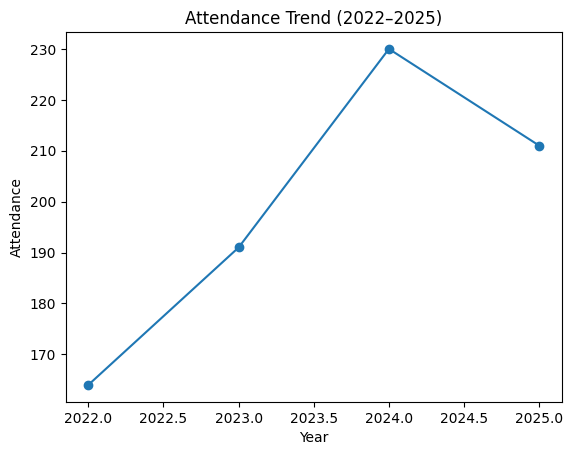

In [ ]:
plt.figure()
plt.plot(kpi["year"], kpi["attendance"], marker="o")
plt.xlabel("Year")
plt.ylabel("Attendance")
plt.title("Attendance Trend (2022–2025)")
plt.show()


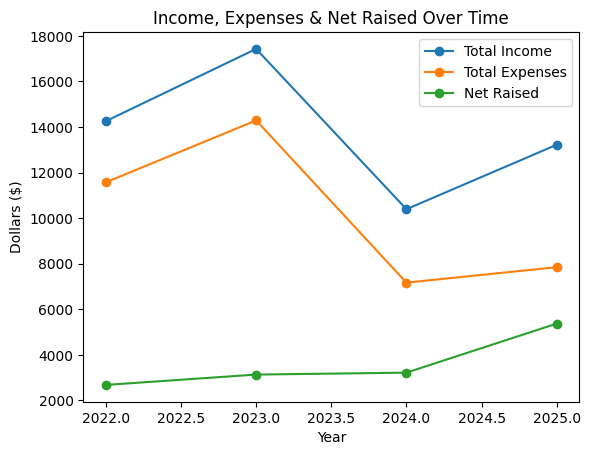

In [ ]:
plt.figure()
plt.plot(kpi["year"], kpi["total_income"], marker="o", label="Total Income")
plt.plot(kpi["year"], kpi["total_expenses"], marker="o", label="Total Expenses")
plt.plot(kpi["year"], kpi["net_raised"], marker="o", label="Net Raised")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Dollars ($)")
plt.title("Income, Expenses & Net Raised Over Time")
plt.show()


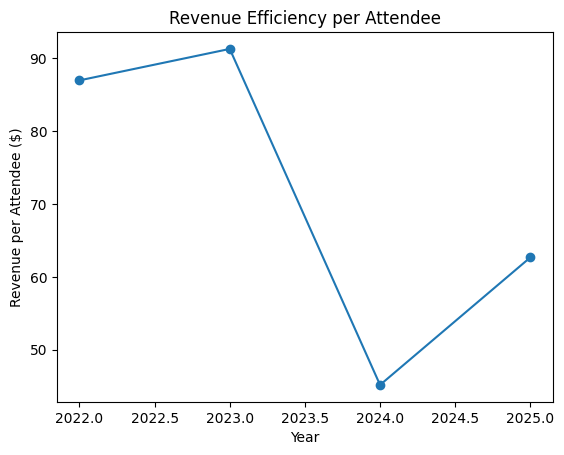

In [ ]:
plt.figure()
plt.plot(kpi["year"], kpi["revenue_per_attendee"], marker="o")
plt.xlabel("Year")
plt.ylabel("Revenue per Attendee ($)")
plt.title("Revenue Efficiency per Attendee")
plt.show()


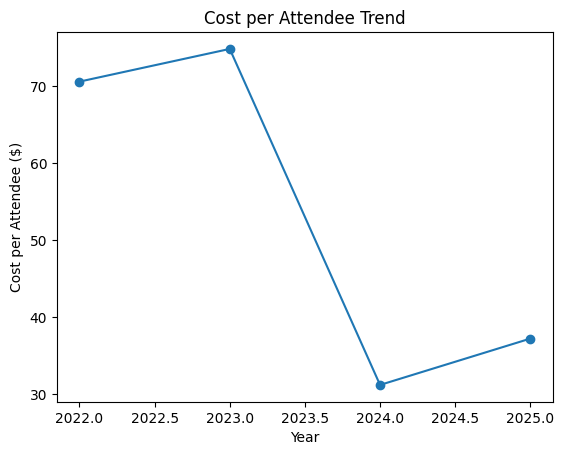

In [ ]:
plt.figure()
plt.plot(kpi["year"], kpi["cost_per_attendee"], marker="o")
plt.xlabel("Year")
plt.ylabel("Cost per Attendee ($)")
plt.title("Cost per Attendee Trend")
plt.show()


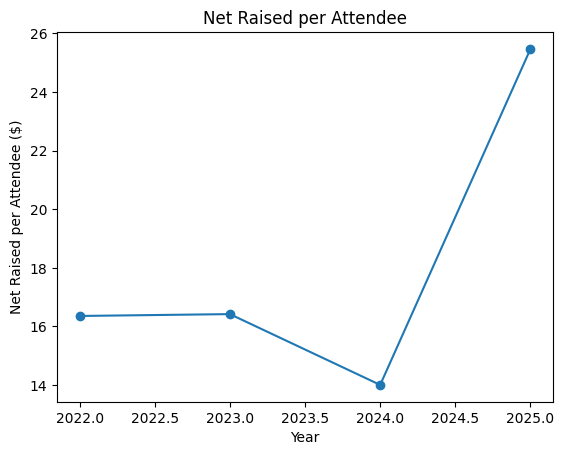

In [ ]:
plt.figure()
plt.plot(kpi["year"], kpi["net_per_attendee"], marker="o")
plt.xlabel("Year")
plt.ylabel("Net Raised per Attendee ($)")
plt.title("Net Raised per Attendee")
plt.show()


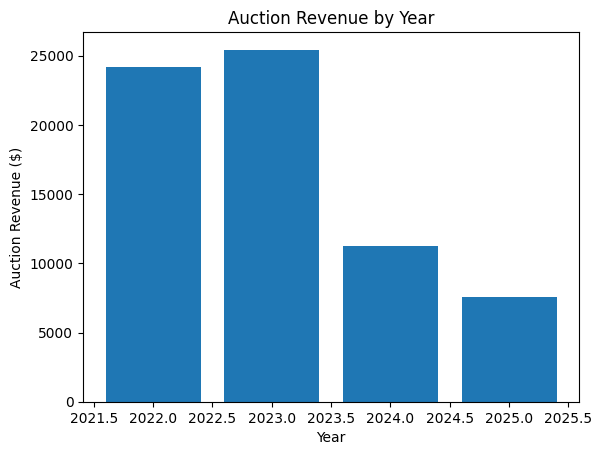

In [ ]:
plt.figure()
plt.bar(kpi["year"], kpi["auction_revenue"])
plt.xlabel("Year")
plt.ylabel("Auction Revenue ($)")
plt.title("Auction Revenue by Year")
plt.show()


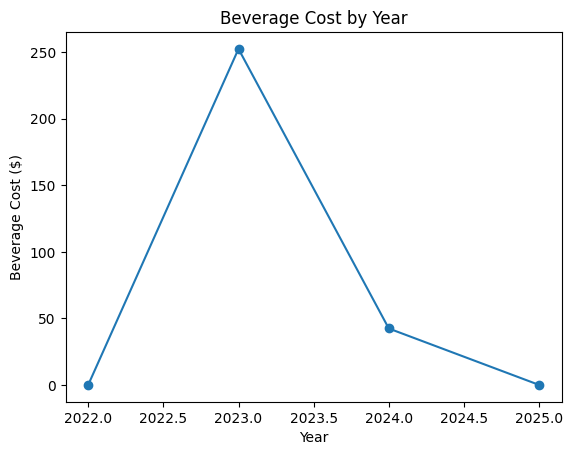

In [ ]:
plt.figure()
plt.plot(kpi["year"], kpi["beverage_cost"], marker="o")
plt.xlabel("Year")
plt.ylabel("Beverage Cost ($)")
plt.title("Beverage Cost by Year")
plt.show()


📊 Exploratory Data Analysis – Key Findings

**Attendance Trends**

Event attendance increased steadily from 2022 through 2024, indicating growing interest and engagement.

Attendance declined slightly in 2025 but remained significantly higher than 2022–2023 levels, suggesting stabilization rather than loss of interest.

**Income, Expenses, and Net Raised**

Total income peaked in 2023, driven largely by strong auction performance.

Expenses were also highest in 2023, reducing the net fundraising impact despite higher revenue.

In 2024 and 2025, tighter expense control resulted in improved net raised outcomes, even when total income was lower.

**Revenue Efficiency per Attendee**

Revenue per attendee was highest in 2022 and 2023, reflecting strong monetization.

A notable decline occurred in 2024, suggesting lower per-attendee spending despite record attendance.

Partial recovery in 2025 indicates improved pricing or revenue mix strategies.

**Cost Efficiency per Attendee**

Cost per attendee was highest in the early years (2022–2023), indicating inefficiencies in event operations.

A significant reduction in cost per attendee occurred in 2024, demonstrating improved operational planning and cost management.

Costs increased slightly in 2025 but remained substantially lower than earlier years.

**Net Raised per Attendee**

Net raised per attendee remained relatively flat in 2022–2023.

A dip in 2024 coincided with reduced revenue efficiency.

2025 achieved the highest net raised per attendee, highlighting the most efficient and effective year from a fundraising perspective.

**Auction Revenue Analysis**

Auction revenue was a major contributor to total income in 2022 and 2023.

A sharp decline in auction revenue occurred in 2024, with further reduction in 2025.

The volatility of auction revenue suggests dependence on item quality, promotion, and bidder engagement, identifying a key area for strategic improvement.

**Beverage Cost Observations**

Beverage costs remained low relative to total expenses and did not significantly impact overall fundraising outcomes.

Spikes in beverage costs were isolated to specific years and were effectively controlled in later years.

**Overall Insights**

Improvements in cost efficiency had a greater impact on net fundraising outcomes than increases in attendance alone.

The shift from growth-focused performance to efficiency-driven performance is most evident in 2025.

Auction strategy and per-attendee monetization represent the highest leverage opportunities for improving future fundraising results.

**Forecasting**

📈 Attendance Forecast (2026) – Interpretation

Historical attendance shows a strong upward trend from 2022 to 2024, followed by a modest decline in 2025, indicating growth with short-term variability rather than a structural downturn.

Using a blended approach that combines a linear trend with recent attendance levels, the expected attendance for 2026 is projected at approximately 235 attendees.

Under a conservative scenario, which accounts for potential external factors such as unfavorable weather or scheduling conflicts, attendance is projected at approximately 223 attendees.

Under an optimistic scenario, assuming effective marketing outreach and favorable event conditions, attendance could reach approximately 254 attendees.

The forecast suggests that attendance in 2026 is likely to exceed 2025 levels and approach or surpass the historical peak observed in 2024.

🧠 Key Takeaways for Planning

Attendance growth appears to be stabilizing at a higher baseline, rather than continuing rapid year-over-year increases.

Planning for 230–240 attendees represents a realistic and prudent baseline for capacity, staffing, and inventory decisions.

The scenario range provides flexibility for contingency planning, allowing organizers to scale operations upward if demand exceeds expectations.

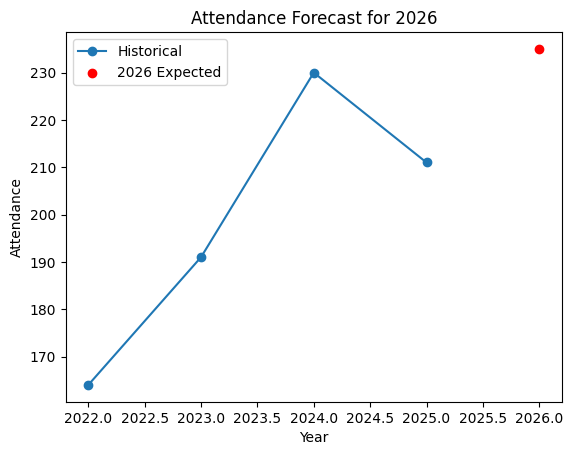

,scenario,attendance_2026
0,Conservative,223
1,Expected,235
2,Optimistic,254


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load KPI data
kpi = pd.read_csv("data/cleaned/unified_kpi.csv")

# Historical attendance
attendance_df = kpi[["year", "attendance"]]

# Fit linear trend
coeffs = np.polyfit(attendance_df["year"], attendance_df["attendance"], 1)
trend_fn = np.poly1d(coeffs)

# Raw trend forecast
attendance_2026_trend = trend_fn(2026)

# Recent average (stabilization adjustment)
recent_avg = attendance_df[attendance_df["year"] >= 2024]["attendance"].mean()

# Blended expected forecast
attendance_2026_expected = round(
    0.6 * attendance_2026_trend + 0.4 * recent_avg
)

# Scenario table
attendance_forecast = pd.DataFrame({
    "scenario": ["Conservative", "Expected", "Optimistic"],
    "attendance_2026": [
        round(attendance_2026_expected * 0.95),
        attendance_2026_expected,
        round(attendance_2026_expected * 1.08)
    ]
})

# Visualization
plt.figure()
plt.plot(attendance_df["year"], attendance_df["attendance"], marker="o", label="Historical")
plt.scatter(2026, attendance_2026_expected, color="red", label="2026 Expected")
plt.xlabel("Year")
plt.ylabel("Attendance")
plt.title("Attendance Forecast for 2026")
plt.legend()
plt.show()

attendance_forecast


📉 Revenue per Attendee Forecast (2026) – Interpretation

Revenue per attendee was strong in 2022 and 2023, indicating effective monetization through ticket pricing and auction performance.

A sharp decline occurred in 2024, despite record attendance, suggesting that higher turnout did not translate into proportional spending per attendee.

In 2025, revenue per attendee partially recovered, reflecting improved cost control and better revenue mix, though it remained below earlier peak levels.

Based on recent performance and a blended trend approach, revenue per attendee in 2026 is expected to be approximately $49.

The forecasted value remains conservative relative to historical highs, reflecting continued uncertainty in auction performance and discretionary spending behavior.

🧠 Scenario Context (Implied by the Model)

Conservative scenario: Revenue per attendee remains subdued if auction engagement does not improve or if attendees are more price-sensitive.

Expected scenario: Moderate improvement from 2024–2025 levels as monetization strategies stabilize.

Optimistic scenario: Revenue per attendee increases meaningfully if higher-value auction items and improved promotion are introduced.

🎯 Key Planning Implications

Future fundraising growth should not rely solely on increasing attendance; improving per-attendee spend is critical.

Auction strategy represents the highest leverage opportunity to raise revenue per attendee.

Forecasting total revenue should use a cautious baseline and incorporate scenario analysis rather than a single-point estimate.

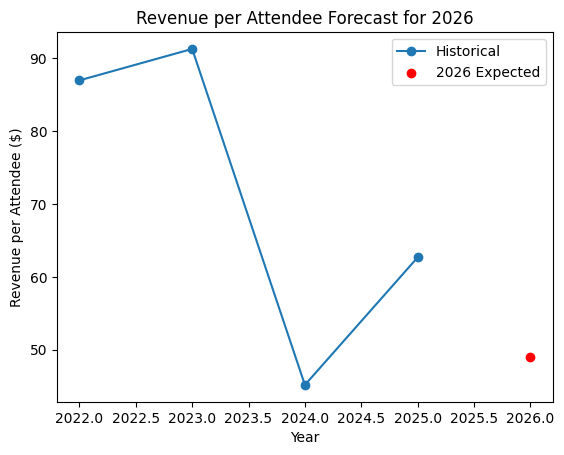

,scenario,revenue_per_attendee_2026
0,Conservative,44.16
1,Expected,49.07
2,Optimistic,56.43


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load KPI data
kpi = pd.read_csv("data/cleaned/unified_kpi.csv")

# Historical revenue per attendee
rev_df = kpi[["year", "revenue_per_attendee"]]

# Fit linear trend
coeffs = np.polyfit(rev_df["year"], rev_df["revenue_per_attendee"], 1)
trend_fn = np.poly1d(coeffs)

# Raw trend forecast
rev_2026_trend = trend_fn(2026)

# Recent average (give more weight to recent efficiency)
recent_avg = rev_df[rev_df["year"] >= 2024]["revenue_per_attendee"].mean()

# Blended expected forecast
rev_2026_expected = round(
    0.6 * recent_avg + 0.4 * rev_2026_trend, 2
)

# Scenario table
revenue_forecast = pd.DataFrame({
    "scenario": ["Conservative", "Expected", "Optimistic"],
    "revenue_per_attendee_2026": [
        round(rev_2026_expected * 0.9, 2),   # weaker auction / pricing
        rev_2026_expected,                   # expected
        round(rev_2026_expected * 1.15, 2)   # improved auction & pricing
    ]
})

# Visualization
plt.figure()
plt.plot(rev_df["year"], rev_df["revenue_per_attendee"], marker="o", label="Historical")
plt.scatter(2026, rev_2026_expected, color="red", label="2026 Expected")
plt.xlabel("Year")
plt.ylabel("Revenue per Attendee ($)")
plt.title("Revenue per Attendee Forecast for 2026")
plt.legend()
plt.show()

revenue_forecast


📉 Cost per Attendee Forecast (2026) – Interpretation

Cost per attendee was relatively high in 2022 and 2023, reflecting early-stage operational inefficiencies and higher fixed costs.

A substantial reduction occurred in 2024, indicating significant improvements in event planning, vendor management, and the use of donated resources.

In 2025, cost per attendee increased slightly but remained well below the levels observed in 2022–2023, suggesting that most efficiency gains were sustained.

Based on recent stabilized cost patterns, cost per attendee in 2026 is expected to be approximately $29–$30.

The forecast assumes continued operational discipline with minimal inflationary pressure and no major changes in event scale or structure.

🧠 Scenario Context

Conservative scenario: Higher per-attendee costs due to inflation, reduced donations, or operational inefficiencies.

Expected scenario: Costs remain close to recent levels, reflecting steady and efficient operations.

Optimistic scenario: Further marginal cost reductions achieved through improved planning and stronger vendor or donor support.

🎯 Key Planning Implications

Cost management improvements achieved since 2024 appear durable and can be carried forward into 2026.

Maintaining costs near $30 per attendee provides flexibility to absorb attendance fluctuations without significantly impacting net funds raised.

Given relatively low cost volatility compared to revenue, future fundraising gains should focus more on revenue optimization than cost cutting.

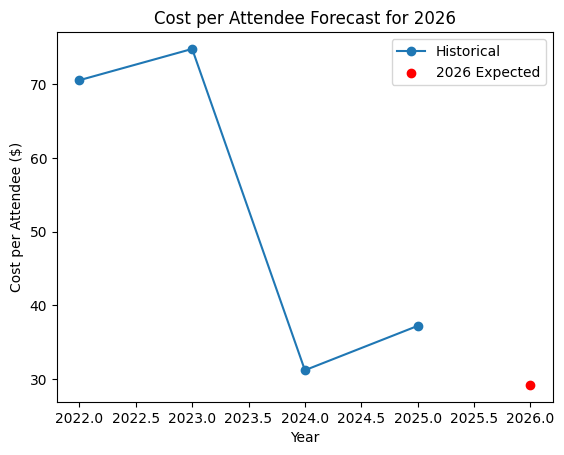

,scenario,cost_per_attendee_2026
0,Conservative,32.10
1,Expected,29.18
2,Optimistic,27.72


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load KPI data
kpi = pd.read_csv("data/cleaned/unified_kpi.csv")

# Historical cost per attendee
cost_df = kpi[["year", "cost_per_attendee"]]

# Fit linear trend
coeffs = np.polyfit(cost_df["year"], cost_df["cost_per_attendee"], 1)
trend_fn = np.poly1d(coeffs)

# Raw trend forecast
cost_2026_trend = trend_fn(2026)

# Recent average (costs stabilized post-2023)
recent_avg = cost_df[cost_df["year"] >= 2024]["cost_per_attendee"].mean()

# Blended expected forecast (favor recent efficiency)
cost_2026_expected = round(
    0.7 * recent_avg + 0.3 * cost_2026_trend, 2
)

# Scenario table
cost_forecast = pd.DataFrame({
    "scenario": ["Conservative", "Expected", "Optimistic"],
    "cost_per_attendee_2026": [
        round(cost_2026_expected * 1.10, 2),  # inflation / inefficiencies
        cost_2026_expected,                   # expected
        round(cost_2026_expected * 0.95, 2)   # better planning & donations
    ]
})

# Visualization
plt.figure()
plt.plot(cost_df["year"], cost_df["cost_per_attendee"], marker="o", label="Historical")
plt.scatter(2026, cost_2026_expected, color="red", label="2026 Expected")
plt.xlabel("Year")
plt.ylabel("Cost per Attendee ($)")
plt.title("Cost per Attendee Forecast for 2026")
plt.legend()
plt.show()

cost_forecast


In [ ]:
import pandas as pd

# -----------------------------
# Merge forecast inputs
# -----------------------------
forecast_2026 = (
    attendance_forecast
    .merge(revenue_forecast, on="scenario")
    .merge(cost_forecast, on="scenario")
)

# -----------------------------
# Compute financial projections
# -----------------------------
forecast_2026["projected_total_income"] = (
    forecast_2026["attendance_2026"] *
    forecast_2026["revenue_per_attendee_2026"]
)

forecast_2026["projected_total_expenses"] = (
    forecast_2026["attendance_2026"] *
    forecast_2026["cost_per_attendee_2026"]
)

forecast_2026["projected_net_raised"] = (
    forecast_2026["projected_total_income"] -
    forecast_2026["projected_total_expenses"]
)

forecast_2026["net_raised_per_attendee"] = (
    forecast_2026["projected_net_raised"] /
    forecast_2026["attendance_2026"]
)

# Round for presentation
forecast_2026 = forecast_2026.round(2)

forecast_2026


,scenario,attendance_2026,revenue_per_attendee_2026,cost_per_attendee_2026,projected_total_income,projected_total_expenses,projected_net_raised,net_raised_per_attendee
0,Conservative,223,44.16,32.10,9847.68,7158.30,2689.38,12.06
1,Expected,235,49.07,29.18,11531.45,6857.30,4674.15,19.89
2,Optimistic,254,56.43,27.72,14333.22,7040.88,7292.34,28.71


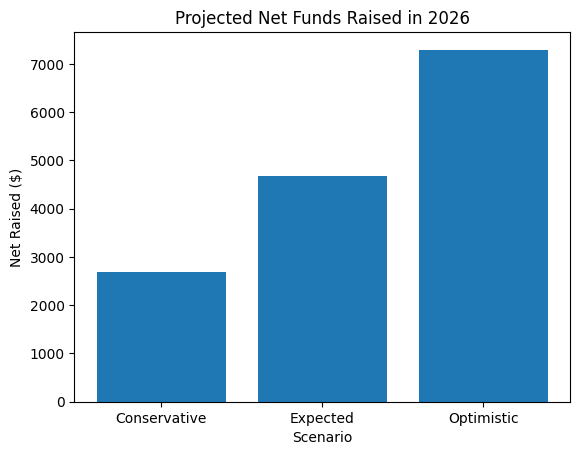

In [ ]:
plt.figure()
plt.bar(
    forecast_2026["scenario"],
    forecast_2026["projected_net_raised"]
)
plt.xlabel("Scenario")
plt.ylabel("Net Raised ($)")
plt.title("Projected Net Funds Raised in 2026")
plt.show()


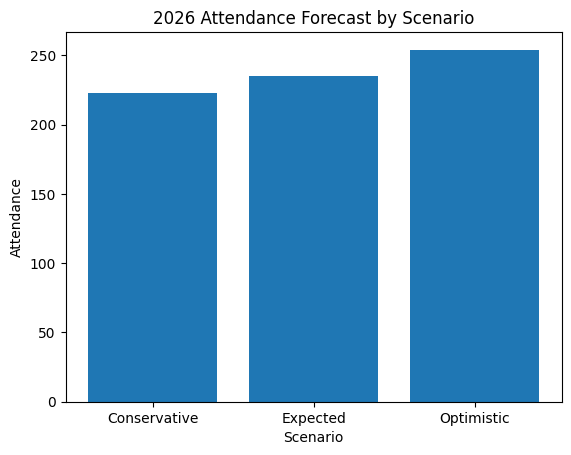

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    attendance_forecast["scenario"],
    attendance_forecast["attendance_2026"]
)
plt.xlabel("Scenario")
plt.ylabel("Attendance")
plt.title("2026 Attendance Forecast by Scenario")
plt.show()


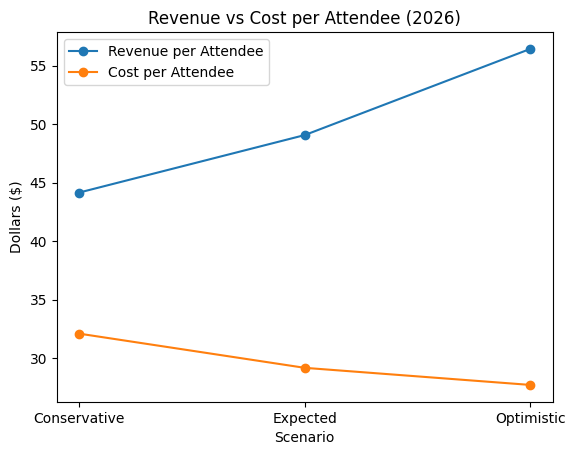

In [ ]:
plt.figure()
plt.plot(
    revenue_forecast["scenario"],
    revenue_forecast["revenue_per_attendee_2026"],
    marker="o",
    label="Revenue per Attendee"
)
plt.plot(
    cost_forecast["scenario"],
    cost_forecast["cost_per_attendee_2026"],
    marker="o",
    label="Cost per Attendee"
)
plt.xlabel("Scenario")
plt.ylabel("Dollars ($)")
plt.title("Revenue vs Cost per Attendee (2026)")
plt.legend()
plt.show()


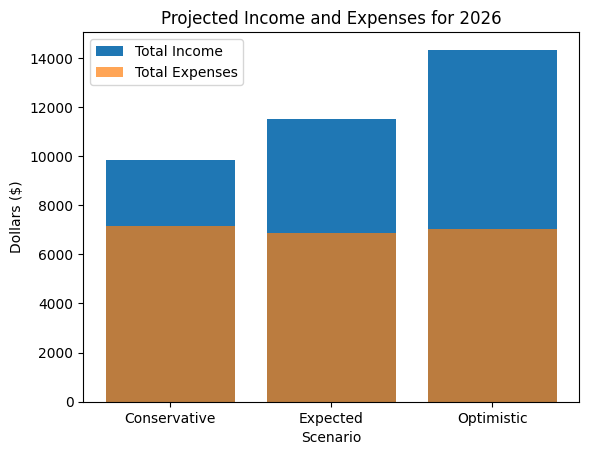

In [ ]:
plt.figure()
plt.bar(
    forecast_2026["scenario"],
    forecast_2026["projected_total_income"],
    label="Total Income"
)
plt.bar(
    forecast_2026["scenario"],
    forecast_2026["projected_total_expenses"],
    bottom=0,
    alpha=0.7,
    label="Total Expenses"
)
plt.xlabel("Scenario")
plt.ylabel("Dollars ($)")
plt.title("Projected Income and Expenses for 2026")
plt.legend()
plt.show()


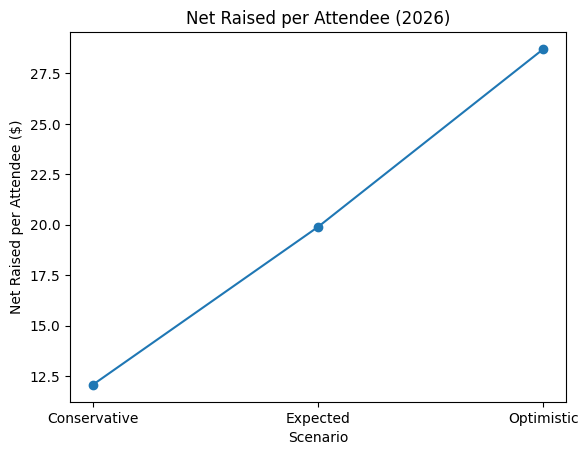

In [ ]:
plt.figure()
plt.plot(
    forecast_2026["scenario"],
    forecast_2026["net_raised_per_attendee"],
    marker="o"
)
plt.xlabel("Scenario")
plt.ylabel("Net Raised per Attendee ($)")
plt.title("Net Raised per Attendee (2026)")
plt.show()


🔮 Forecasting Analysis and Results
Forecasting Objective

The objective of the forecasting analysis is to estimate the expected financial performance of the 2026 alumni event by projecting attendance, revenue efficiency, cost efficiency, and net funds raised. The forecasts are intended to support planning and decision-making rather than produce exact predictions.

Forecasting Methodology

Given the limited historical data available (2022–2025), a scenario-based forecasting approach was adopted instead of complex time-series models. This approach emphasizes interpretability, transparency, and practical relevance for stakeholders.

Three key components were forecasted independently:

Attendance

Revenue per Attendee

Cost per Attendee

Each component was projected using a blended method that combines:

Linear trend extrapolation

Recent historical averages

Business judgment informed by exploratory data analysis (EDA)

Forecast uncertainty was addressed by constructing three scenarios:

Conservative

Expected

Optimistic

Attendance Forecast

Historical attendance showed steady growth from 2022 through 2024, followed by a modest decline in 2025. This pattern suggests stabilization at a higher baseline rather than a sustained downward trend.

Using a combination of linear trend analysis and recent attendance averages, attendance for 2026 was forecasted as follows:

Conservative: Lower-bound estimate reflecting unfavorable external factors

Expected: Continuation of recent attendance levels

Optimistic: Increased attendance driven by effective marketing and favorable event conditions

The expected attendance forecast for 2026 is approximately 235 attendees, with a plausible range between 223 and 254 attendees across scenarios.

Revenue per Attendee Forecast

Revenue per attendee exhibited strong performance in 2022 and 2023, followed by a significant decline in 2024 despite high attendance. Partial recovery was observed in 2025, indicating improved monetization efficiency.

To forecast revenue per attendee, greater weight was placed on recent performance to account for structural changes in pricing, auction participation, and attendee spending behavior. Scenario-based adjustments were applied to capture variability in auction outcomes and discretionary spending.

The expected revenue per attendee for 2026 is approximately $49, with lower values under conservative assumptions and higher values under optimistic assumptions reflecting improved auction engagement and pricing strategies.

Cost per Attendee Forecast

Cost per attendee decreased substantially after 2023, reflecting improved operational efficiency, better vendor management, and increased reliance on donated resources. Costs stabilized in 2024 and 2025, indicating that efficiency gains were largely sustained.

The cost per attendee forecast for 2026 assumes continued operational discipline with modest inflationary pressure. The expected cost per attendee is projected at approximately $29–$30, with limited variability across scenarios.

Net Funds Raised Forecast

Net funds raised for 2026 were computed by combining the attendance, revenue per attendee, and cost per attendee forecasts under each scenario:

Net Raised
=
(
Attendance
×
Revenue per Attendee
)
−
(
Attendance
×
Cost per Attendee
)
Net Raised=(Attendance×Revenue per Attendee)−(Attendance×Cost per Attendee)

Results indicate:

The event remains financially viable even under conservative assumptions.

The expected scenario yields net fundraising outcomes that exceed most historical years.

The optimistic scenario demonstrates significant upside potential, primarily driven by improvements in revenue per attendee rather than attendance growth alone.

Key Forecasting Insights

Improvements in revenue per attendee have a greater impact on fundraising outcomes than increases in attendance.

Sustained cost efficiency substantially reduces downside financial risk.

Auction performance represents the most influential and volatile driver of total revenue.

Scenario-based forecasting provides a more realistic planning framework than single-point estimates.

Assumptions and Limitations

Historical data is limited to four years, restricting model complexity.

Forecasts assume a consistent event format and similar external conditions.

Marketing effectiveness and auction quality are assumed to remain within historical ranges.

External economic or environmental shocks are not explicitly modeled.

In [ ]:
# -----------------------------
# INSTALL (COLAB)
# -----------------------------
!pip install plotly

# -----------------------------
# IMPORTS
# -----------------------------
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# LOAD DATA
# -----------------------------
kpi = pd.read_csv("data/cleaned/unified_kpi.csv")
forecast = forecast_2026.copy()   # already computed earlier

# -----------------------------
# CREATE 3x2 DASHBOARD GRID
# Row 3 will have a single plot spanning both columns for the summary table
# -----------------------------
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=[
        "Attendance Trend (2022–2026)",
        "Net Funds Raised Trend",
        "Revenue vs Cost per Attendee",
        "2026 Financial Breakdown by Scenario",
        "2026 Scenario Summary" # Title for the combined 3rd row
    ],
    specs=[
        [{}, {}],
        [{}, {}],
        [{"colspan": 2, "type": "table"}, None] # Table type for the summary
    ]
)

# ---- Plot 1: Attendance Trend ----
# Historical
fig.add_trace(
    go.Scatter(
        x=kpi["year"],
        y=kpi["attendance"],
        mode="lines+markers",
        name="Historical Attendance",
        showlegend=True,
        marker=dict(color='black'),
        legendgroup="attendance"
    ),
    row=1, col=1
)
# 2026 Forecasts
for idx, row in forecast.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[2026],
            y=[row["attendance_2026"]],
            mode="markers",
            marker=dict(size=12, symbol='circle' if row['scenario']=='Expected' else 'square'),
            marker_color='red' if row['scenario']=='Expected' else ('orange' if row['scenario']=='Conservative' else 'green'),
            name=f"2026 {row['scenario']} Attendance",
            showlegend=True,
            legendgroup="attendance"
        ),
        row=1, col=1
    )


# ---- Plot 2: Net Funds Raised Trend ----
# Historical
fig.add_trace(
    go.Scatter(
        x=kpi["year"],
        y=kpi["net_raised"],
        mode="lines+markers",
        name="Historical Net Raised",
        showlegend=True,
        marker=dict(color='black'),
        legendgroup="net_raised"
    ),
    row=1, col=2
)
# 2026 Forecasts
for idx, row in forecast.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[2026],
            y=[row["projected_net_raised"]],
            mode="markers",
            marker=dict(size=12, symbol='circle' if row['scenario']=='Expected' else 'square'),
            marker_color='red' if row['scenario']=='Expected' else ('orange' if row['scenario']=='Conservative' else 'green'),
            name=f"2026 {row['scenario']} Net Raised",
            showlegend=True,
            legendgroup="net_raised"
        ),
        row=1, col=2
    )


# ---- Plot 3: Revenue vs Cost per Attendee ----
# Historical Revenue
fig.add_trace(
    go.Scatter(
        x=kpi["year"],
        y=kpi["revenue_per_attendee"],
        mode="lines+markers",
        name="Historical Rev/Att",
        legendgroup="group_rev_cost",
        marker=dict(color='blue'),
        showlegend=True
    ),
    row=2, col=1
)
# Historical Cost
fig.add_trace(
    go.Scatter(
        x=kpi["year"],
        y=kpi["cost_per_attendee"],
        mode="lines+markers",
        name="Historical Cost/Att",
        legendgroup="group_rev_cost",
        marker=dict(color='orange'),
        showlegend=True
    ),
    row=2, col=1
)
# 2026 Forecast Revenue
for idx, row in forecast.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[2026],
            y=[row["revenue_per_attendee_2026"]],
            mode="markers",
            marker=dict(size=12, symbol='circle' if row['scenario']=='Expected' else 'square', color='blue'),
            name=f"2026 {row['scenario']} Rev/Att",
            legendgroup="group_rev_cost",
            showlegend=True
        ),
        row=2, col=1
    )
# 2026 Forecast Cost
for idx, row in forecast.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[2026],
            y=[row["cost_per_attendee_2026"]],
            mode="markers",
            marker=dict(size=12, symbol='circle' if row['scenario']=='Expected' else 'square', color='orange'),
            name=f"2026 {row['scenario']} Cost/Att",
            legendgroup="group_rev_cost",
            showlegend=True
        ),
        row=2, col=1
    )


# ---- Plot 4: 2026 Financial Breakdown by Scenario (Grouped Bar Chart) ----
# Get data for grouped bars
scenarios = forecast["scenario"].tolist()
income_values = forecast["projected_total_income"].tolist()
expense_values = forecast["projected_total_expenses"].tolist()
net_raised_values = forecast["projected_net_raised"].tolist()

fig.add_trace(
    go.Bar(
        x=scenarios,
        y=income_values,
        name='Projected Income',
        marker_color='skyblue',
        legendgroup="financial_breakdown",
        showlegend=True
    ),
    row=2, col=2
)
fig.add_trace(
    go.Bar(
        x=scenarios,
        y=expense_values,
        name='Projected Expenses',
        marker_color='salmon',
        legendgroup="financial_breakdown",
        showlegend=True
    ),
    row=2, col=2
)
fig.add_trace(
    go.Bar(
        x=scenarios,
        y=net_raised_values,
        name='Projected Net Raised',
        marker_color='lightgreen',
        legendgroup="financial_breakdown",
        showlegend=True
    ),
    row=2, col=2
)


# ---- Plot 5: 2026 Scenario Summary Table ----
table_metrics = [
    "Scenario",
    "Attendance",
    "Revenue per Attendee",
    "Cost per Attendee",
    "Projected Total Income",
    "Projected Total Expenses",
    "Projected Net Raised",
    "Net Raised per Attendee"
]

# Prepare table data for all scenarios
table_data = {
    'Metric': [
        "Attendance",
        "Revenue per Attendee",
        "Cost per Attendee",
        "Projected Total Income",
        "Projected Total Expenses",
        "Projected Net Raised",
        "Net Raised per Attendee"
    ]
}

for s in forecast["scenario"].unique():
    scenario_s = forecast[forecast["scenario"] == s].iloc[0]
    table_data[s] = [
        f"{int(scenario_s['attendance_2026'])}",
        f"${scenario_s['revenue_per_attendee_2026']:.2f}",
        f"${scenario_s['cost_per_attendee_2026']:.2f}",
        f"${scenario_s['projected_total_income']:.0f}",
        f"${scenario_s['projected_total_expenses']:.0f}",
        f"${scenario_s['projected_net_raised']:.0f}",
        f"${scenario_s['net_raised_per_attendee']:.2f}"
    ]

fig.add_trace(
    go.Table(
        header=dict(values=['Metric'] + forecast["scenario"].tolist(), fill_color='paleturquoise', align='left'),
        cells=dict(values=[table_data['Metric']] + [table_data[s] for s in forecast["scenario"]],
                   fill_color='lavender', align='left')
    ),
    row=3, col=1
)

# -----------------------------
# LAYOUT
# -----------------------------
fig.update_layout(
    title={
        "text": "🎓 Alumni Event Dashboard: Performance & 2026 Business Impact (All Scenarios)",
        "x": 0.5
    },
    height=1200, # Increased height to accommodate the table and grouped bars
    showlegend=True
)

# Update subplot axis titles for clarity
fig.update_yaxes(title_text="Attendees", row=1, col=1)
fig.update_yaxes(title_text="Dollars ($)", row=1, col=2)
fig.update_yaxes(title_text="Dollars ($) per Attendee", row=2, col=1)
fig.update_yaxes(title_text="Dollars ($)", row=2, col=2)

fig.show()
